<a href="https://colab.research.google.com/github/maksudrakib44/Machine-Learning-Python/blob/main/Data_Visualization_CLP_18_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLP_18-10-2025

**Name: Md. Maksudul Haque**

**ID: 221002127**

221_D21

Load 'Mall' dataset from my drive

In [ ]:

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML Dataset/Mall/Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()
df.describe(include='all')


df.columns = [c.strip().replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_') for c in df.columns]
df.rename(columns={'Genre':'Gender', 'Annual_Income_k$':'Annual_Income', 'Spending_Score_1_100':'Spending_Score'}, inplace=True)

print("Columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Columns: ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']


**Check none value**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income,0
Spending_Score,0


**What is the distribution of customers by gender and age groups?**

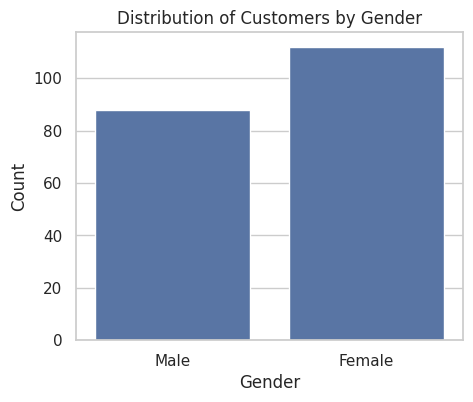

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


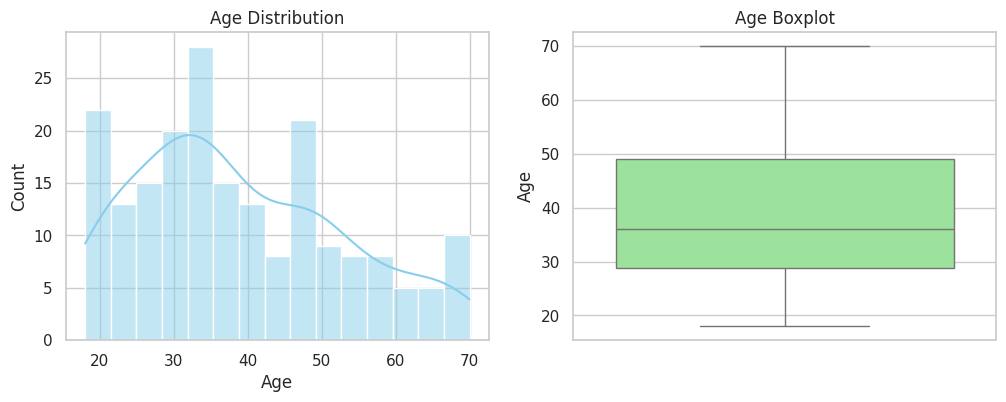

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins=15, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.boxplot(y='Age', data=df, color='lightgreen')
plt.title('Age Boxplot')
plt.show()


**How does income level vary across different customer segments?**

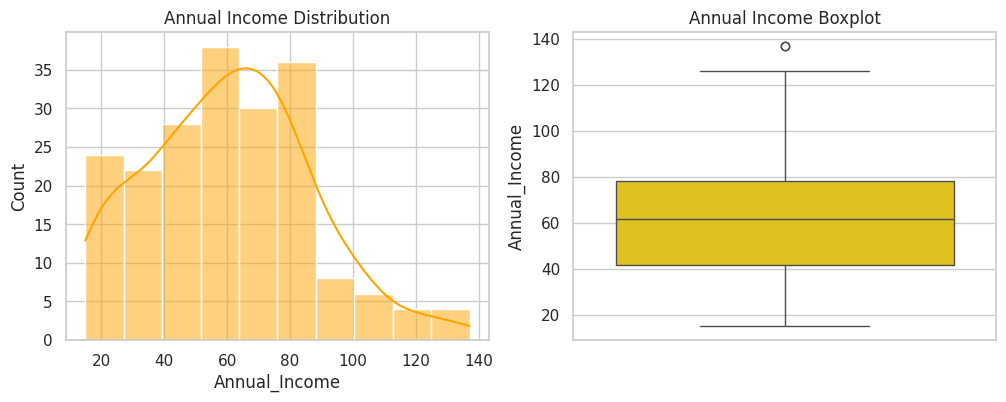

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Annual_Income'], kde=True, color='orange')
plt.title('Annual Income Distribution')

plt.subplot(1,2,2)
sns.boxplot(y='Annual_Income', data=df, color='gold')
plt.title('Annual Income Boxplot')
plt.show()



**What is the average spending of customers based on age or gender?**

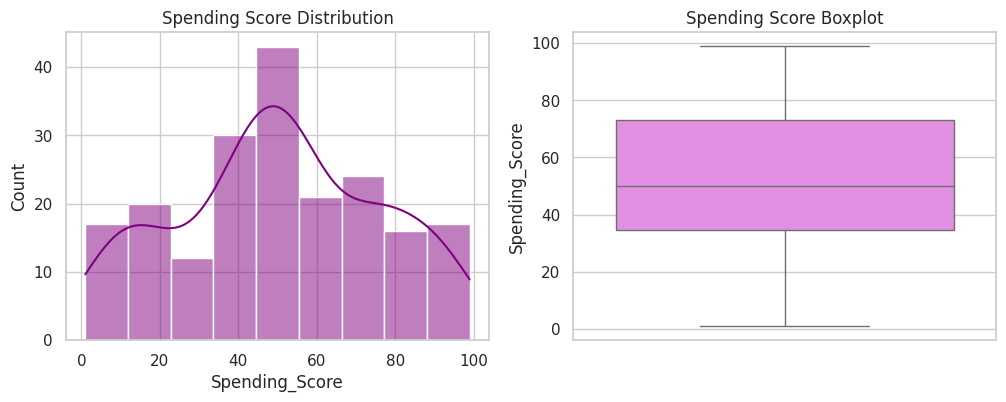

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Spending_Score'], kde=True, color='purple')
plt.title('Spending Score Distribution')

plt.subplot(1,2,2)
sns.boxplot(y='Spending_Score', data=df, color='violet')
plt.title('Spending Score Boxplot')
plt.show()


**Are there any significant differences in spending patterns between male and female customers?**

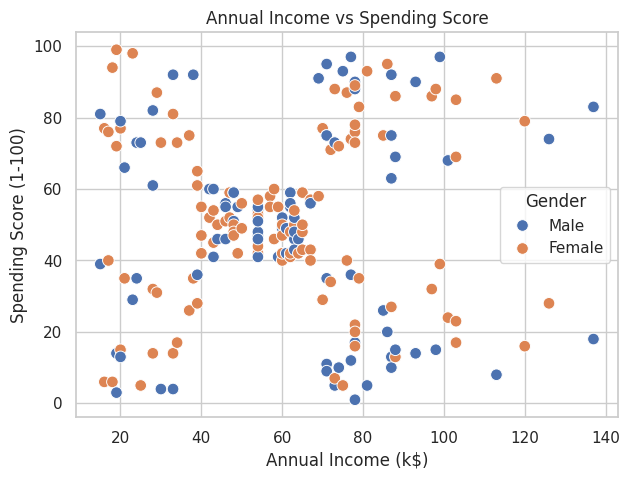

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Gender', data=df, s=70)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()


**How does spending behavior vary by day of the week or time of the day (if timestamps available)?**

In [ ]:
if 'Timestamp' in df.columns or 'Date' in df.columns:
    date_col = 'Timestamp' if 'Timestamp' in df.columns else 'Date'
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['Day'] = df[date_col].dt.day_name()
    df['Hour'] = df[date_col].dt.hour

    plt.figure(figsize=(8,4))
    sns.countplot(x='Day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.title('Spending Behavior by Day of Week')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.countplot(x='Hour', data=df)
    plt.title('Spending Behavior by Hour of Day')
    plt.show()
else:
    print("No timestamp/date column found — skipping day/time analysis.")


No timestamp/date column found — skipping day/time analysis.


**Are there seasonal or monthly trends in customer purchases?**

In [ ]:

if 'Timestamp' in df.columns or 'Date' in df.columns:
    date_col = 'Timestamp' if 'Timestamp' in df.columns else 'Date'
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['Month'] = df[date_col].dt.month_name()

    plt.figure(figsize=(9,4))
    sns.countplot(x='Month', data=df,
                  order=['January','February','March','April','May','June','July','August','September','October','November','December'])
    plt.title('Monthly Trends in Customer Purchases')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No date column found — skipping monthly trend analysis.")


No date column found — skipping monthly trend analysis.


**Is there any correlation between age and annual income or spending score?**

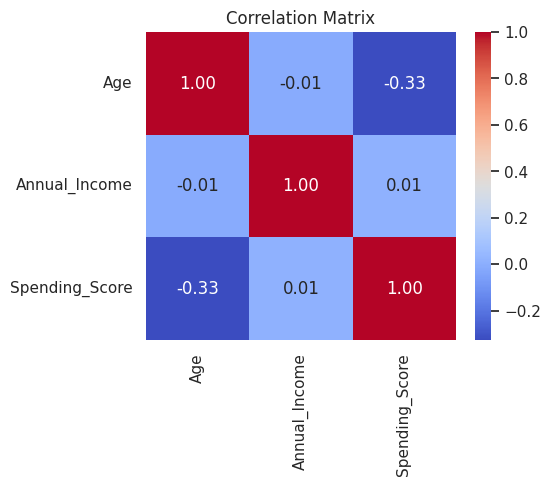

In [ ]:
corr = df[['Age','Annual_Income','Spending_Score']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**How do different variables like age, income, and spending score relate to one another?**

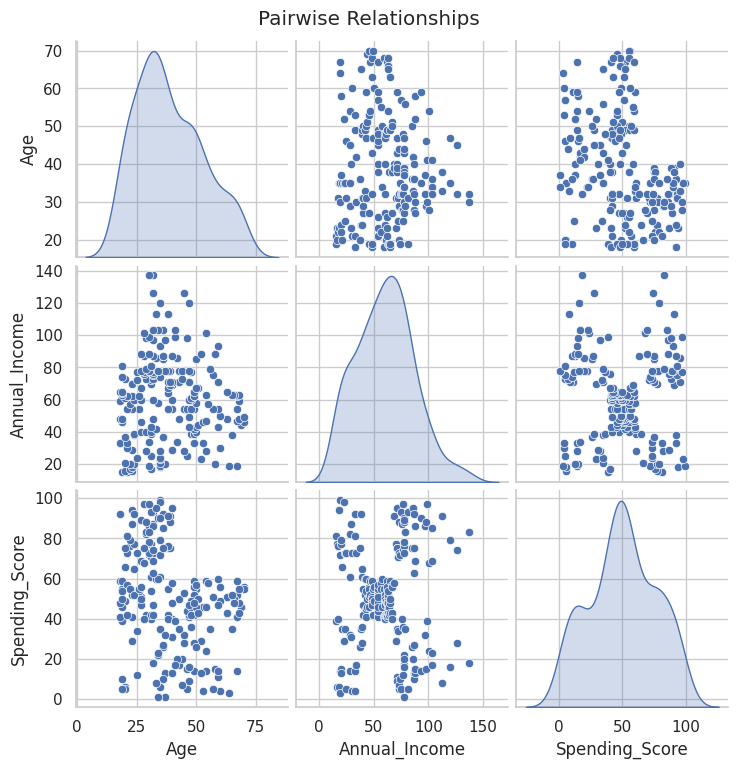

In [ ]:
sns.pairplot(df[['Age','Annual_Income','Spending_Score']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


**What do the distributions of age, income, and spending score look like via histograms or box plots?**

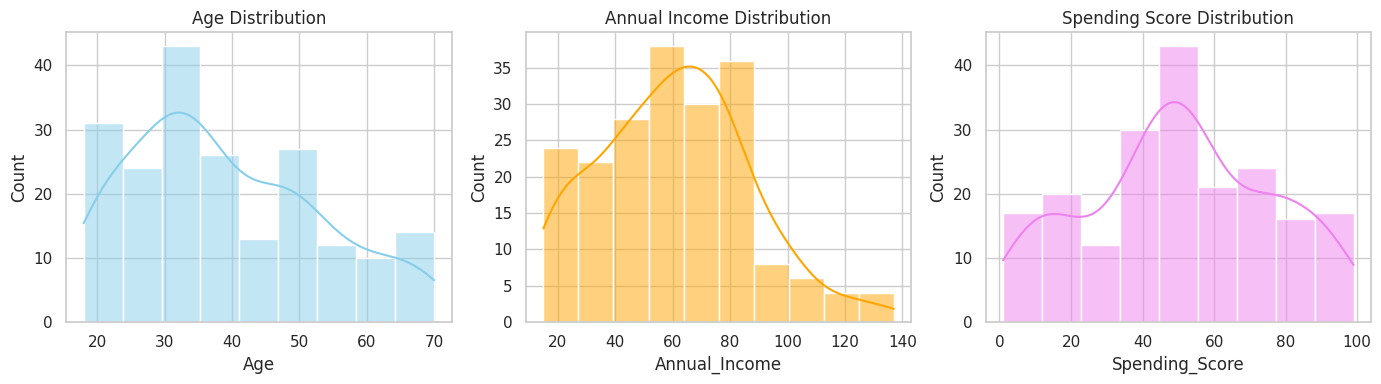

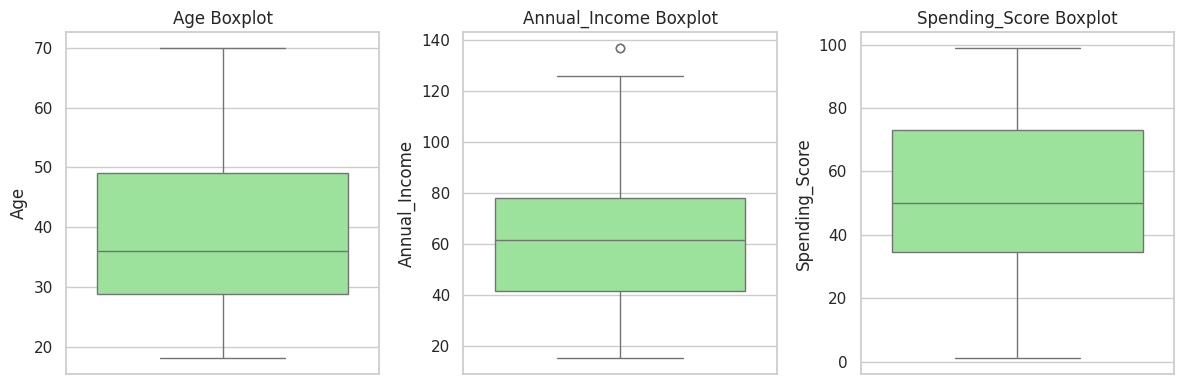

In [ ]:

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1,3,2)
sns.histplot(df['Annual_Income'], kde=True, color='orange')
plt.title('Annual Income Distribution')

plt.subplot(1,3,3)
sns.histplot(df['Spending_Score'], kde=True, color='violet')
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
for i, col in enumerate(['Age','Annual_Income','Spending_Score']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


**Customer segments in a 2D or 3D scatter**

/tmp/ipython-input-3057631785.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, palette='tab10', s=70)


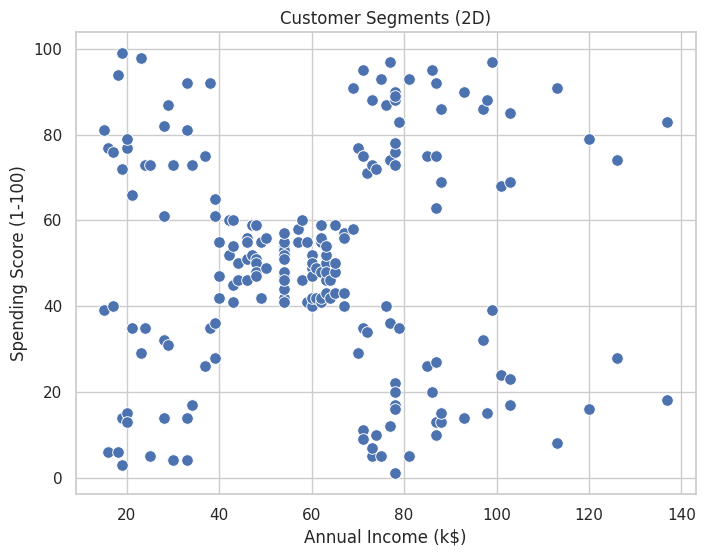

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, palette='tab10', s=70)
plt.title('Customer Segments (2D)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
